### Import Libraries

In [23]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt  
import seaborn as sns  

## Classifier models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Libraries for training
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedGroupKFold 

import warnings
warnings.filterwarnings("ignore")


### Data Overview

In [2]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset contains 31 columns 

In [4]:
df.columns, len(df.columns)

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'),
 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.isnull().sum().sum() # No null values

0

Highly imbalanced data

In [13]:
print(f"Not Fraud: {round(df['Class'].value_counts()[0]/ len(df)*100,2)}%")
print(f"Fraud: {round(df['Class'].value_counts()[1]/ len(df)*100,2)}%")

Not Fraud: 99.83%
Fraud: 0.17%


Text(0.5, 1.0, '0:No Fraud || 1: Fraud')

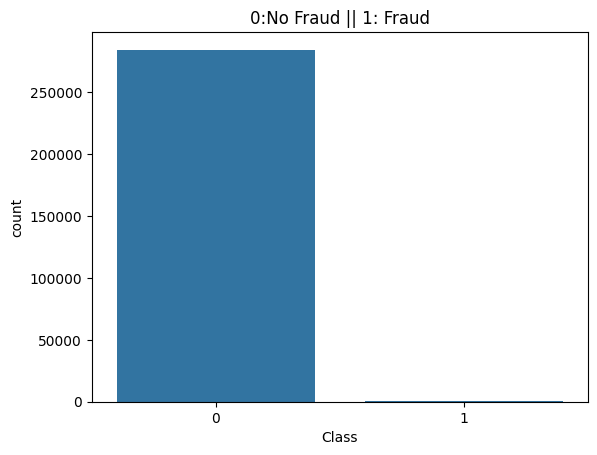

In [19]:
sns.countplot(x='Class', data=df)
plt.title("0:No Fraud || 1: Fraud")

(0.0, 172792.0)

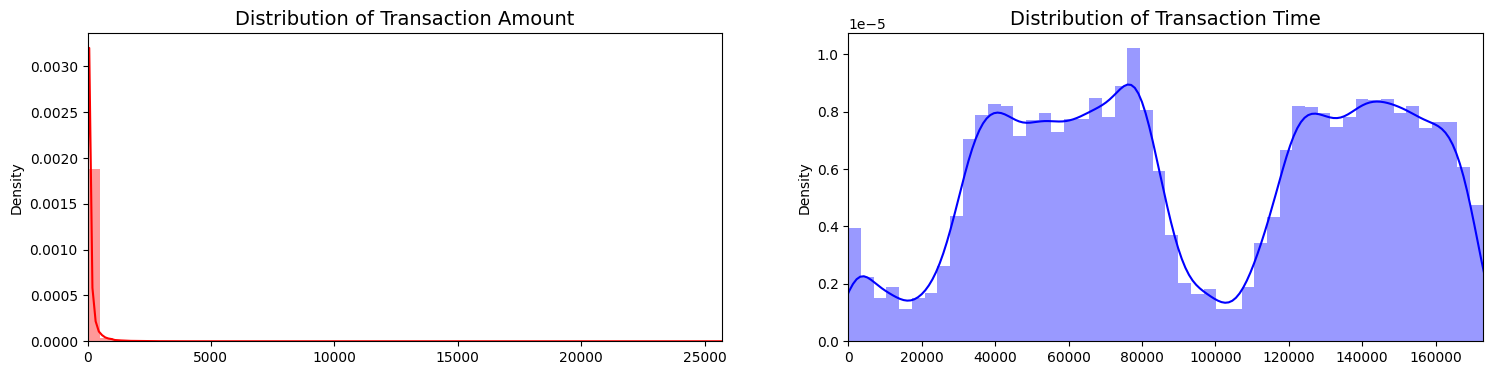

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

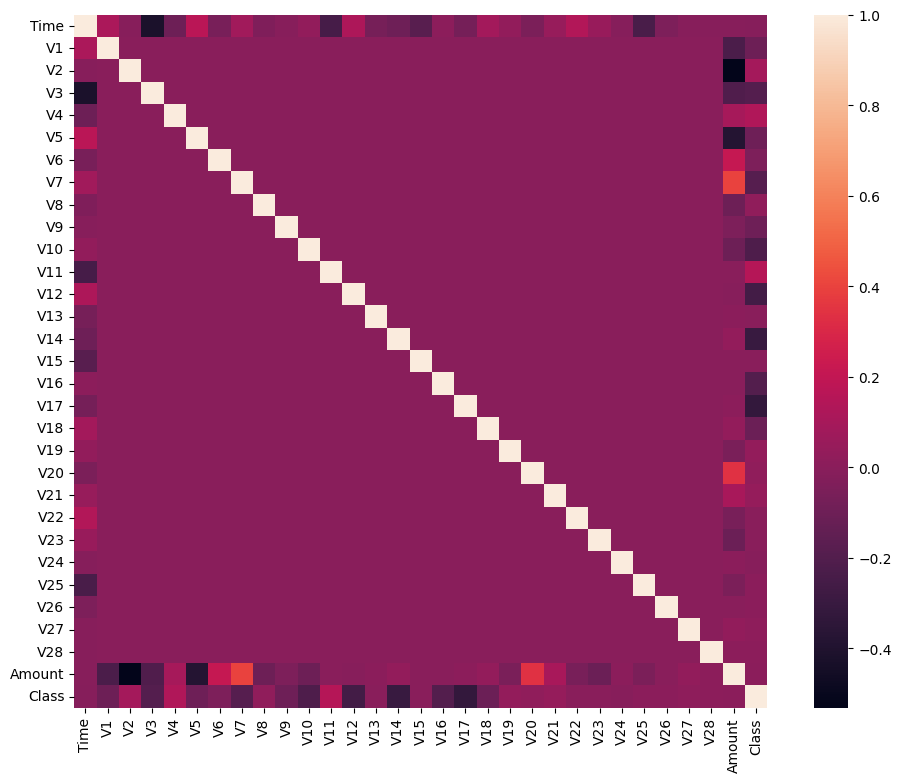

In [26]:
corrmat = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,square=True)
plt.show()

In [27]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### Result analysis

In [54]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data/creditcard.csv")

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rf = joblib.load('artifacts/model/rf_model.joblib')
gbc = joblib.load('artifacts/model/gbc_model_best_param.joblib')
knn = joblib.load('artifacts/model/knn_model.joblib')
lr = joblib.load('artifacts/model/lg_model.joblib')

In [57]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)

    probas = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    precision, recall, thresholds = precision_recall_curve(y_test, probas)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    report = classification_report(y_test, predictions, output_dict=True)
    cm = confusion_matrix(y_test, predictions)

    return {
        'roc_curve': (fpr, tpr),
        'roc_auc': roc_auc,
        'precision_recall_curve': (precision, recall, thresholds),
        'confusion_matrix': confusion_matrix(y_test, predictions),
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cm,
        'f1_score': f1
        # Add other metrics as needed
    }

In [58]:
rf_output = evaluate_model(rf, X_test, y_test)
gbc_output = evaluate_model(gbc, X_test, y_test)
knn_output = evaluate_model(knn, X_test, y_test)
lr_output = evaluate_model(lr, X_test, y_test)

/home/nicole/portfolio/fraud-detection/.venv/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/nicole/portfolio/fraud-detection/.venv/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/nicole/portfolio/fraud-detection/.venv/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/nicole/portfolio/fraud-detection/.venv/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/home/nicole/portfolio/fraud-detection/.venv/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without 

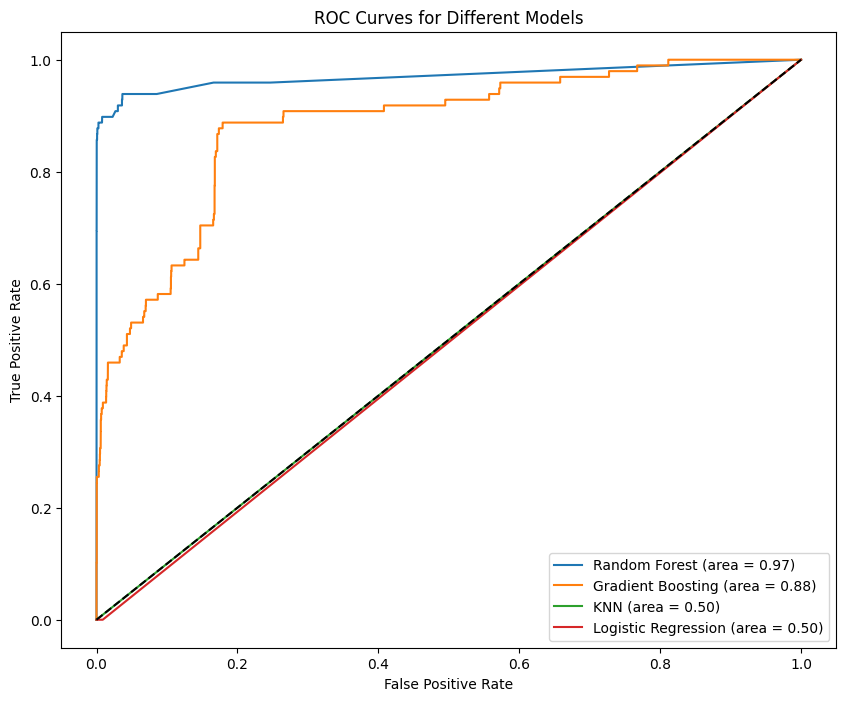

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
for model_output, model_name in zip([rf_output, gbc_output, knn_output, lr_output], ['Random Forest', 'Gradient Boosting', 'KNN', 'Logistic Regression']):
    fpr, tpr = model_output['roc_curve']
    roc_auc = model_output['roc_auc']
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


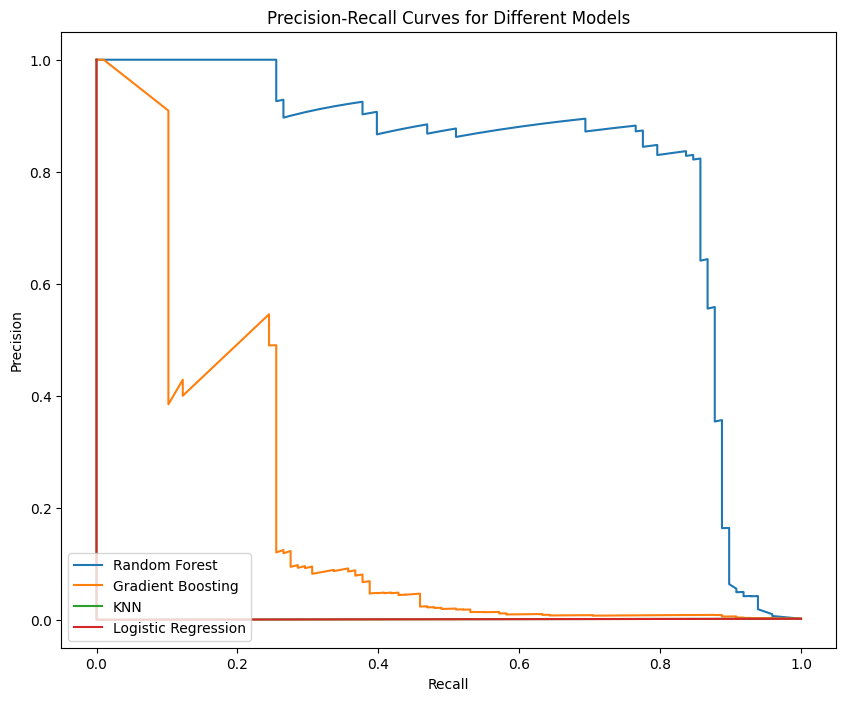

In [60]:
plt.figure(figsize=(10, 8))

# Plot each model's precision-recall curve
for model_output, model_name in zip([rf_output, gbc_output, knn_output, lr_output], ['Random Forest', 'Gradient Boosting', 'KNN', 'Logistic Regression']):
    precision, recall, _ = model_output['precision_recall_curve']
    plt.plot(recall, precision, label=f'{model_name}')

plt.title('Precision-Recall Curves for Different Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


In [35]:
# Assume precision, recall, and thresholds are arrays from the Random Forest model's precision-recall curve.
precision, recall, thresholds = rf_output['precision_recall_curve']

# Find the index where both precision and recall are closest to 0.8
closest_index = np.argmin(np.sqrt((precision - 0.8)**2 + (recall - 0.8)**2))

# Extract the threshold value at this index
target_threshold = thresholds[closest_index]
target_threshold

0.14999412901109266

In [64]:
import numpy as np
from pandas.plotting import table 
from datetime import datetime

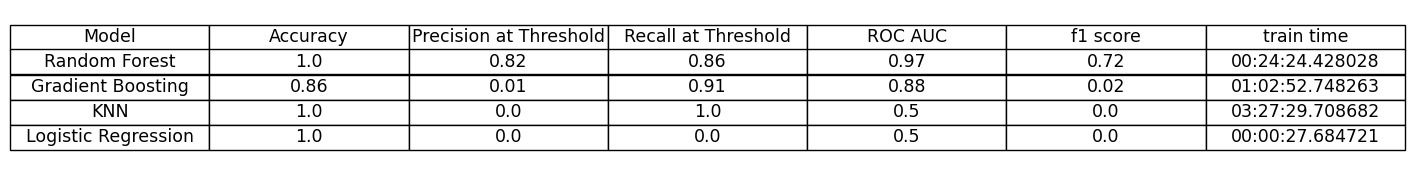

In [70]:
def get_precision_recall_at_threshold(precision, recall, thresholds, target_threshold):
    # Function to find closest threshold and return corresponding precision and recall
    closest_threshold_index = np.argmin(np.abs(thresholds - target_threshold))
    return precision[closest_threshold_index], recall[closest_threshold_index]

target_threshold = 0.14  # Example threshold

summary = pd.DataFrame(
    columns=['Model', 'Accuracy', 'Precision at Threshold', 'Recall at Threshold', 'ROC AUC', 'f1 score', 'train time'],
    data=[
        ['Random Forest', rf_output['accuracy']] + list(get_precision_recall_at_threshold(*rf_output['precision_recall_curve'], target_threshold)) + [rf_output['roc_auc'], rf_output['f1_score'], datetime.strptime('0:24:24.428028', "%H:%M:%S.%f").time()],
        ['Gradient Boosting', gbc_output['accuracy']] + list(get_precision_recall_at_threshold(*gbc_output['precision_recall_curve'], target_threshold)) + [gbc_output['roc_auc'], gbc_output['f1_score'], datetime.strptime('1:02:52.748263', "%H:%M:%S.%f").time()],
        ['KNN', knn_output['accuracy']] + list(get_precision_recall_at_threshold(*knn_output['precision_recall_curve'], target_threshold)) + [knn_output['roc_auc'], knn_output['f1_score'],datetime.strptime('3:27:29.708682', "%H:%M:%S.%f").time()],
        ['Logistic Regression', lr_output['accuracy']] + list(get_precision_recall_at_threshold(*lr_output['precision_recall_curve'], target_threshold)) + [lr_output['roc_auc'], lr_output['f1_score'],datetime.strptime('0:00:27.684721', "%H:%M:%S.%f").time()]
    ]
).round(2)

ig, ax = plt.subplots(figsize=(12, 2))  # Adjust the figure size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
tbl = ax.table(cellText=summary.values, colLabels=summary.columns, loc='center', cellLoc='center')

# Set the font size and scale the table up
tbl.auto_set_font_size(False)
tbl.set_fontsize(12.5)
tbl.scale(1.5, 1.5)